In [ ]:
#############
# Constants (From /Volumes/Untitled/seungwoong.ha/collmind/proj_utils_gpu.py")#
#############
from datetime import datetime

DATA_DIR = "/data/comments/valentin"

COLLECTION_NAMES = ["Atlantic", "Breitbart", "Gatewaypundit", "Motherjones", "Thehill"]

DATE_RANGES_OLD = {
    "Atlantic": (datetime(2012, 6, 1), datetime(2018, 5, 1)),
    "Breitbart": (datetime(2012, 6, 1), datetime(2021, 6, 1)),
    "Gatewaypundit": (datetime(2015, 1, 1), datetime(2021, 6, 1)),
    "Motherjones": (datetime(2012, 6, 1), datetime(2019, 9, 1)),
    "Thehill": (datetime(2012, 6, 1), datetime(2021, 6, 1))
    
}

DATE_RANGES = {
    "Atlantic": (datetime(2012, 6, 1), datetime(2018, 5, 1)),
    "Breitbart": (datetime(2012, 6, 1), datetime(2023, 4, 1)),
    "Gatewaypundit": (datetime(2015, 1, 1), datetime(2023, 4, 1)),
    "Motherjones": (datetime(2012, 6, 1), datetime(2019, 9, 1)),
    "Thehill": (datetime(2012, 6, 1), datetime(2022, 3, 1))
}

MODEL_NAMES = {
    "Atlantic": 'atlantic_new_s4_r19_h200_u80_t10',
    "Breitbart": 'breitbart_new_s3_r19_h225_u20_t10',
    "Gatewaypundit": 'gatewaypundit_new_s4_r19_h400_u30_t10',
    "Motherjones": 'motherjones_new_s5_r19_h425_u90_t10',
    "Thehill": 'thehill_new_s2_r19_h300_u80_t10',
    "global": 'global_new_s1_r19_h325_u20_t10',
    "title": 'title_new_s2_r19_h35_u50_t10'
}

NUM_TOPICS = {
    "Atlantic": 219,
    "Breitbart": 287,
    "Gatewaypundit": 251,
    "Motherjones": 120,
    "Thehill": 257
}  # excluding -1

In [3]:
import pyarrow.parquet as pq

# Read the schema of the Parquet file
parquet_file = pq.ParquetFile("/Volumes/Untitled/seungwoong.ha/collmind/result/user_trajectory_df.parquet")

# Print the schema to inspect the columns and their data types
print(parquet_file.schema)


required group field_id=-1 schema {
  optional binary field_id=-1 user_id (String);
  optional group field_id=-1 comment_id (List) {
    repeated group field_id=-1 list {
      optional binary field_id=-1 item (String);
    }
  }
  optional group field_id=-1 article_id (List) {
    repeated group field_id=-1 list {
      optional binary field_id=-1 item (String);
    }
  }
  optional group field_id=-1 collection_id (List) {
    repeated group field_id=-1 list {
      optional int64 field_id=-1 item;
    }
  }
  optional group field_id=-1 createdAt (List) {
    repeated group field_id=-1 list {
      optional int64 field_id=-1 item (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
    }
  }
  optional int64 field_id=-1 num_comments;
  optional int64 field_id=-1 age;
}



In [5]:
import pyarrow.parquet as pq
import pandas as pd

parquet_file = pq.ParquetFile("/Volumes/Untitled/seungwoong.ha/collmind/result/user_trajectory_df.parquet")

# Define a reasonable batch size based on your memory constraints
batch_size = 1000
all_dfs = []

for batch in parquet_file.iter_batches(batch_size=batch_size):
    df_batch = batch.to_pandas()
    # Either process each batch individually or collect them
    all_dfs.append(df_batch)

In [6]:
# Optionally combine all batches if you need the complete dataset
full_df = pd.concat(all_dfs, ignore_index=True)
full_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0
...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0


In [7]:
full_df.sort_values(by='num_comments')

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age
996270,26419542,[535259466],[693717227],[1],[2012-05-22T06:41:24.000000],1,0
1218652,171903667,[2222473068],[4066540815],[2],[2015-08-28T04:38:39.000000],1,0
1218649,171899830,[2222444648],[4068461541],[2],[2015-08-28T04:02:19.000000],1,0
1218647,171898437,[2222440041],[4066540815],[2],[2015-08-28T03:56:32.000000],1,0
1218646,171897958,[2222431601],[4069586371],[2],[2015-08-28T03:46:36.000000],1,0
...,...,...,...,...,...,...,...
255883,118923992,"[2224712852, 2224713835, 2224714650, 222471795...","[4076604340, 4076604340, 4076604340, 407660434...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2015-08-29T13:43:41.000000, 2015-08-29T13:44:...",271875,2687
119890,198561383,"[2542676302, 2542676888, 2542677609, 254267795...","[4615029681, 4615029681, 4615029681, 461502968...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2016-02-29T04:05:54.000000, 2016-02-29T04:06:...",287743,2222
141405,183286256,"[2370341529, 2370352681, 2373716186, 237371855...","[4335703261, 4335703261, 4342083462, 434208346...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[2015-11-20T17:37:33.000000, 2015-11-20T17:44:...",297922,2538
115447,239117587,"[3228189189, 3228214391, 3228296679, 322830682...","[5674825114, 5674825114, 5674591744, 567459174...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2017-03-28T19:49:05.000000, 2017-03-28T20:04:...",300969,1827


In [ ]:
time_diff = full_df.loc[22124, 'createdAt'].max() - full_df.loc[22124, 'createdAt'].min()
time_diff = pd.to_timedelta(time_diff)
total_seconds = time_diff.total_seconds()

# Number of seconds in a year, month, week, and day
seconds_in_year = 3600 * 24 * 365.25  # Including leap years
seconds_in_month = 3600 * 24 * 30  # Approximate month (30 days)
seconds_in_week = 3600 * 24 * 7  # Week
seconds_in_day = 3600 * 24  # Day
years = total_seconds / seconds_in_year
months = total_seconds / seconds_in_month
weeks = total_seconds / seconds_in_week
days = total_seconds / seconds_in_day

# Print the result
print(f"ming: {full_df.loc[22124, 'createdAt'].min()} | max: {full_df.loc[22124, 'createdAt'].max()}")


print(f"user with most comments' age in years: {years:.2f} years")
print(f"user with most comments' age in months: {months:.2f} months")
print(f"user with most comments' age in weeks: {weeks:.2f} weeks")
print(f"user with most comments' age in days: {days:.2f} days")

ming: 2015-07-21T15:11:14.000000 | max: 2022-04-01T03:35:00.000000
user with most comments' age in years: 6.70 years
user with most comments' age in months: 81.52 months
user with most comments' age in weeks: 349.36 weeks
user with most comments' age in days: 2445.52 days


In [ ]:
full_df.rename(columns={'age' : 'age_days'}, inplace = True)

In [34]:
# count rows with count == 1

percentage = (full_df[full_df["num_comments"] == 1].shape[0] / full_df.shape[0]) * 100
print(f"commenters with just one comment: {full_df[full_df['num_comments'] == 1].shape[0]} | {percentage:.2f}%")

commenters with just one comment: 757153 | 38.00%


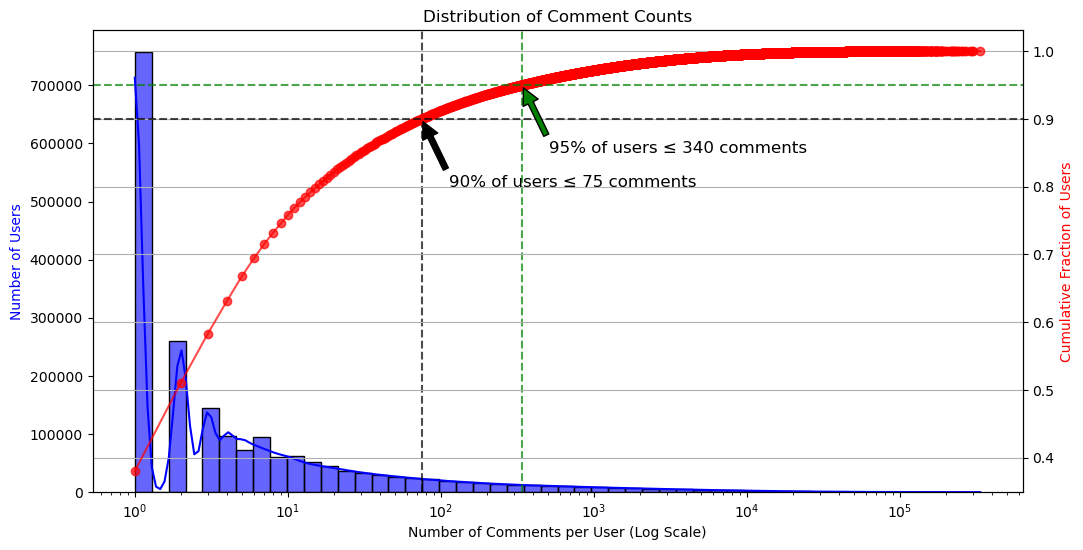

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Count how many users made X comments
count_distribution = full_df["num_comments"].value_counts().sort_index()

# Step 2: Compute cumulative fraction of users
cumulative_users = np.cumsum(count_distribution) / count_distribution.sum()

# Replot to add reference lines
fig, ax1 = plt.subplots(figsize=(12, 6))

# Histogram
sns.histplot(full_df["num_comments"], bins=50, kde=True, log_scale=(True, False), ax=ax1, color="blue", alpha=0.6)
ax1.set_xlabel("Number of Comments per User (Log Scale)")
ax1.set_ylabel("Number of Users", color="blue")
ax1.set_title("Distribution of Comment Counts")

# Cumulative Line
ax2 = ax1.twinx()
ax2.plot(cumulative_users.index, cumulative_users.values, color="red", marker="o", linestyle="-", alpha=0.7)
ax2.set_ylabel("Cumulative Fraction of Users", color="red")

percentile_90 = cumulative_users[cumulative_users >= 0.9].index[0]  # First value where cumulative fraction ≥ 0.9
percentile_95 = cumulative_users[cumulative_users >= 0.95].index[0]  # First value where cumulative fraction ≥ 0.95

# Draw Reference Lines at 90th and 95th Percentiles
ax2.axhline(y=0.9, color="black", linestyle="dashed", alpha=0.7)  # Horizontal line at 90% users
ax1.axvline(x=percentile_90, color="black", linestyle="dashed", alpha=0.7)  # Vertical line at 90th percentile

ax2.axhline(y=0.95, color="green", linestyle="dashed", alpha=0.7)  # Horizontal line at 95% users
ax1.axvline(x=percentile_95, color="green", linestyle="dashed", alpha=0.7)  # Vertical line at 95th percentile

# Annotate the points
ax2.annotate(f"90% of users ≤ {percentile_90} comments",
             xy=(percentile_90, 0.9),
             xytext=(percentile_90 * 1.5, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12)

ax2.annotate(f"95% of users ≤ {percentile_95} comments",
             xy=(percentile_95, 0.95),
             xytext=(percentile_95 * 1.5, 0.85),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontsize=12)

plt.grid()
plt.show()

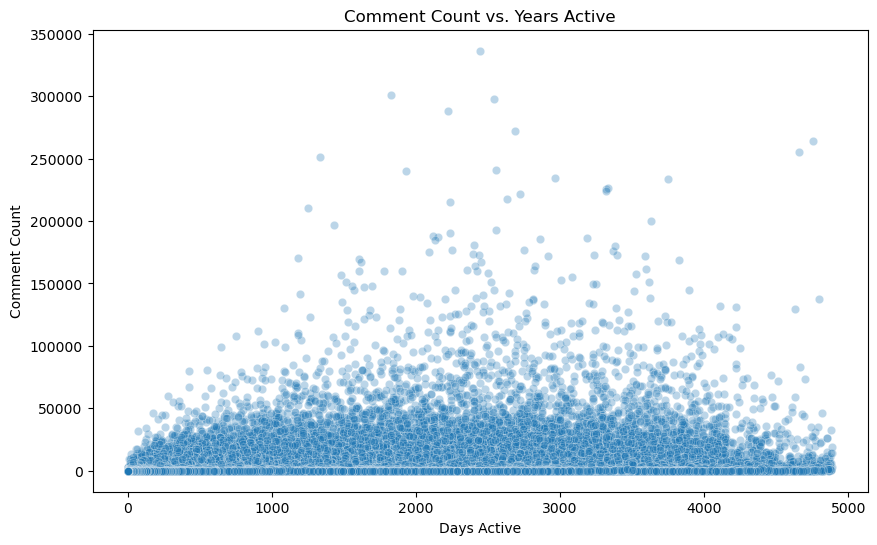

In [37]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=full_df,
    x="age_days",
    y="num_comments",
    alpha=0.3  # transparency, so dense areas are darker
)

plt.xlabel("Days Active")
plt.ylabel("Comment Count") 
# plt.yscale("log")  # often needed if 'count' has a wide range
plt.title("Comment Count vs. Years Active")
plt.show()


### Analyzing User Behavior Across Collections

In [74]:
full_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0
...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0


In [55]:
subsample_df = full_df.head(2).copy()
subsample_df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026


In [57]:
for col_id in range(5):
    subsample_df[f'collection_{col_id}_count'] = subsample_df['collection_id'].apply(
        lambda x: x.tolist().count(col_id)
    )

# Create total count column (sum of all collections)
subsample_df['total_collection_comments'] = subsample_df[[
    f'collection_{i}_count' for i in range(5)
]].sum(axis=1)

# Verify against existing num_comments column
if 'num_comments' in subsample_df:
    mismatch = subsample_df.query('total_collection_comments != num_comments')
    print(f"Data consistency check: {len(mismatch)} mismatched rows")

subsample_df

Data consistency check: 0 mismatched rows


,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days,collection_0_count,collection_1_count,collection_2_count,collection_3_count,collection_4_count,total_collection_comments
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775,9177,86244,123,0,0,95544
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026,697,3,6,0,0,706


now all full_df

In [92]:
df = full_df.copy()

In [93]:
# count the colection_id of each user 

for col_id in range(5):
    df[f'collection_{col_id}_count'] = df['collection_id'].apply(
        lambda x: x.tolist().count(col_id)
    )

# Create total count column (sum of all collections)
df['total_collection_comments'] = df[[
    f'collection_{i}_count' for i in range(5)
]].sum(axis=1)

# Verify against existing num_comments column
if 'num_comments' in df:
    mismatch = df.query('total_collection_comments != num_comments')
    print(f"Data consistency check: {len(mismatch)} mismatched rows")

df

Data consistency check: 0 mismatched rows


,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days,collection_0_count,collection_1_count,collection_2_count,collection_3_count,collection_4_count,total_collection_comments
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775,9177,86244,123,0,0,95544
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026,697,3,6,0,0,706
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225,653,0,0,0,0,653
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703,9038,20735,88,0,1,29862
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0,0,0,0,0,1,1
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0,0,0,0,0,1,1
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0,0,0,0,0,1,1
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0,0,0,0,0,1,1


In [97]:
# Percentage distribution per collection
for i in range(5):
    df[f'collection_{i}_pct'] = (
        df[f'collection_{i}_count'] / 
        df['total_collection_comments']
    ).round(3)

collection_cols = [f"collection_{i}_count" for i in range(5)]

# Dominant collection analysis
df['primary_collection'] = df[collection_cols].idxmax(axis=1).str.extract(r"(\d)")[0].astype(int).map(dict(enumerate(COLLECTION_NAMES)))
df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days,collection_0_count,collection_1_count,collection_2_count,collection_3_count,collection_4_count,total_collection_comments,collection_0_pct,collection_1_pct,collection_2_pct,collection_3_pct,collection_4_pct,primary_collection
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775,9177,86244,123,0,0,95544,0.096,0.903,0.001,0.0,0.0,Breitbart
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026,697,3,6,0,0,706,0.987,0.004,0.008,0.0,0.0,Atlantic
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225,653,0,0,0,0,653,1.000,0.000,0.000,0.0,0.0,Atlantic
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703,9038,20735,88,0,1,29862,0.303,0.694,0.003,0.0,0.0,Breitbart
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0,1,0,0,0,0,1,1.000,0.000,0.000,0.0,0.0,Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill


In [98]:
df[collection_cols].astype(bool).astype(int)

,collection_0_count,collection_1_count,collection_2_count,collection_3_count,collection_4_count
0,1,1,1,0,0
1,1,1,1,0,0
2,1,0,0,0,0
3,1,1,1,0,1
4,1,0,0,0,0
...,...,...,...,...,...
1992537,0,0,0,0,1
1992538,0,0,0,0,1
1992539,0,0,0,0,1
1992540,0,0,0,0,1


In [99]:
df['num_collections'] = (df[collection_cols] > 0).sum(axis=1)
df

,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days,collection_0_count,collection_1_count,collection_2_count,collection_3_count,collection_4_count,total_collection_comments,collection_0_pct,collection_1_pct,collection_2_pct,collection_3_pct,collection_4_pct,primary_collection,num_collections
0,98984140,"[1296188855, 1538670905, 1538673711, 153867633...","[2479818491, 2919574806, 2919574806, 291957480...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2014-03-22T08:48:35.000000, 2014-08-12T08:07:...",95544,1775,9177,86244,123,0,0,95544,0.096,0.903,0.001,0.0,0.0,Breitbart,3
1,119681868,"[1766699258, 1767767286, 1768599205, 176870299...","[3377750257, 3381059643, 3382088630, 338352429...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:03:48.000000, 2015-01-01T22:50:...",706,2026,697,3,6,0,0,706,0.987,0.004,0.008,0.0,0.0,Atlantic,3
2,80705336,"[1766708109, 1766781995, 1767283930, 176779769...","[3378186944, 3378186944, 3379967272, 337818694...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2015-01-01T00:14:33.000000, 2015-01-01T01:49:...",653,1225,653,0,0,0,0,653,1.000,0.000,0.000,0.0,0.0,Atlantic,1
3,46987845,"[848139831, 1318705113, 1353706075, 1399594770...","[1178114936, 2586046961, 2636003224, 270476032...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[2013-03-31T23:44:39.000000, 2014-04-04T17:14:...",29862,3703,9038,20735,88,0,1,29862,0.303,0.694,0.003,0.0,0.0,Breitbart,4
4,137569935,[1766728393],[3377148162],[0],[2015-01-01T00:33:40.000000],1,0,1,0,0,0,0,1,1.000,0.000,0.000,0.0,0.0,Atlantic,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992537,386700367,[5945168033],[9303859903],[4],[2022-08-12T06:15:40.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill,1
1992538,380909193,[5710779204],[8989006764],[4],[2022-01-27T21:08:27.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill,1
1992539,345270447,[5716815397],[8998684079],[4],[2022-02-01T01:18:27.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill,1
1992540,381459559,[5730145969],[9013121563],[4],[2022-02-11T13:52:03.000000],1,0,0,0,0,0,1,1,0.000,0.000,0.000,0.0,1.0,Thehill,1


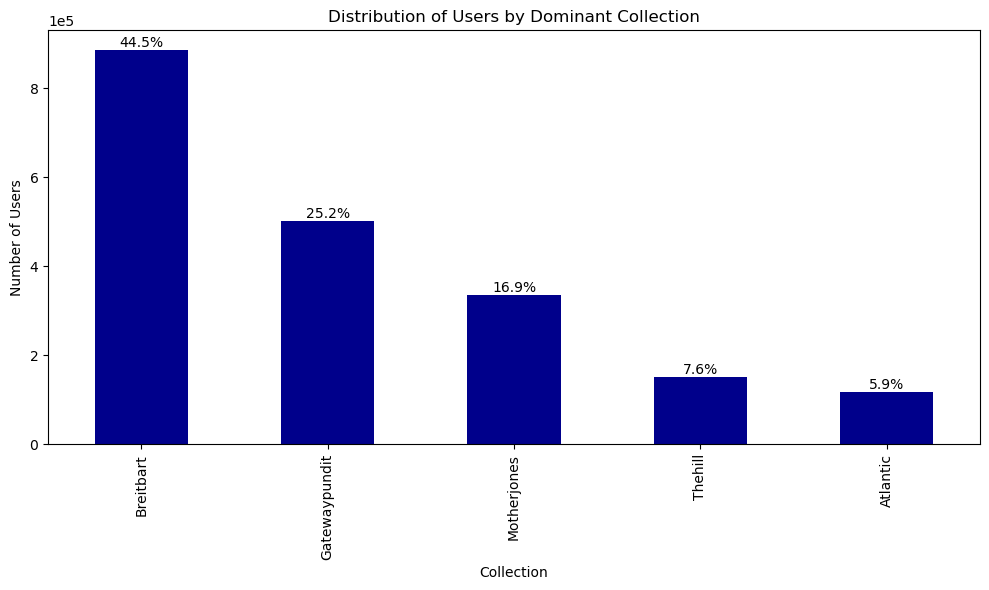

In [102]:

# Plot distribution of dominant collections
plt.figure(figsize=(10, 6))
dominant_counts = df['primary_collection'].value_counts()
dominant_counts.plot(kind='bar', color='darkblue')
plt.title('Distribution of Users by Dominant Collection')
plt.xlabel('Collection')
plt.ylabel('Number of Users')
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
# Add percentage labels on top of each bar
total = len(df)
for i, count in enumerate(dominant_counts):
    plt.text(i, count, f"{count/total*100:.1f}%", ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [115]:
# 2. Calculate diversity scores for all users (Shannon entropy)
def calculate_diversity(row):
    # Assuming row contains collection_0_pct, collection_1_pct, etc. values between 0-1
    values = [row[f'collection_{i}_pct'] for i in range(5)]
    # Filter out zeros to avoid log(0)
    values = [v for v in values if v > 0]
    if not values:
        return 0
    # Shannon entropy calculation
    entropy = -sum(v * np.log(v) for v in values)
    # Normalize by maximum possible entropy (log of number of collections)
    max_entropy = np.log(5)  # Using 5 as the total number of possible collections
    return entropy / max_entropy if max_entropy > 0 else 0
# Apply the diversity calculation to the DataFrame
df['diversity_score'] = df.apply(calculate_diversity, axis=1)

# Show descriptive statistics for the diversity scores
df.diversity_score.describe()

count    1.992542e+06
mean     1.004551e-01
std      1.888935e-01
min     -0.000000e+00
25%      0.000000e+00
50%     -0.000000e+00
75%      7.369955e-02
max      1.000000e+00
Name: diversity_score, dtype: float64

In [116]:
print(df.diversity_score.describe())
df.sort_values(by='diversity_score', ascending=False).head(25)

count    1.992542e+06
mean     1.004551e-01
std      1.888935e-01
min     -0.000000e+00
25%      0.000000e+00
50%     -0.000000e+00
75%      7.369955e-02
max      1.000000e+00
Name: diversity_score, dtype: float64


,user_id,comment_id,article_id,collection_id,createdAt,num_comments,age_days,collection_0_count,collection_1_count,collection_2_count,...,total_collection_comments,collection_0_pct,collection_1_pct,collection_2_pct,collection_3_pct,collection_4_pct,primary_collection,num_collections,diversity_score,active_collections
74587,61541916,"[956937477, 2419559614, 2590109465, 3321830447...","[1469538091, 4418894368, 4693478548, 584376237...","[3, 4, 2, 0, 1]","[2013-07-10T01:07:55.000000, 2015-12-21T10:16:...",5,1897,1,1,1,...,5,0.200,0.200,0.200,0.200,0.200,Atlantic,5,1.000000,5
38514,71396755,"[2583842039, 2611666644, 2680924507, 377550325...","[4682655450, 4727559997, 4834852120, 105190574...","[0, 3, 2, 4, 1]","[2016-03-22T20:57:09.000000, 2016-04-07T18:54:...",5,1510,1,1,1,...,5,0.200,0.200,0.200,0.200,0.200,Atlantic,5,1.000000,5
21747,53022326,"[419640072, 994697266, 1217595451, 1475226028,...","[549676379, 1578474315, 2173563482, 2824757913...","[3, 4, 2, 1, 0]","[2012-01-24T16:30:58.000000, 2013-08-09T17:22:...",5,1268,1,1,1,...,5,0.200,0.200,0.200,0.200,0.200,Atlantic,5,1.000000,5
222977,66614928,"[1494410830, 2851343347, 3329041588, 510045267...","[646746291, 5083172804, 2032456682, 8224476660...","[3, 2, 4, 1, 0]","[2014-07-20T19:07:51.000000, 2016-08-22T08:53:...",5,2482,1,1,1,...,5,0.200,0.200,0.200,0.200,0.200,Atlantic,5,1.000000,5
88503,30355369,"[615913001, 2302260725, 3417024326, 3566225936...","[745301205, 4212464325, 5482144663, 6213173320...","[4, 2, 3, 0, 1]","[2012-08-10T20:24:17.000000, 2015-10-12T01:36:...",5,3144,1,1,1,...,5,0.200,0.200,0.200,0.200,0.200,Atlantic,5,1.000000,5
129749,43974157,"[513989489, 1328684098, 1328688900, 1328694763...","[389843413, 1519996827, 1519996827, 1519996827...","[3, 4, 4, 4, 4, 1, 3, 3, 1, 2, 2, 2, 4, 1, 2, ...","[2012-04-30T07:28:26.000000, 2014-04-10T11:42:...",28,2654,7,6,5,...,28,0.250,0.214,0.179,0.179,0.179,Atlantic,5,0.994355,5
80313,53903088,"[617238232, 1908257098, 1908260678, 1934226267...","[769242799, 3595724874, 3595724874, 3541759299...","[4, 3, 3, 1, 4, 1, 1, 2, 0, 0, 2]","[2012-08-12T10:58:39.000000, 2015-03-15T14:28:...",11,3305,2,3,2,...,11,0.182,0.273,0.182,0.182,0.182,Breitbart,5,0.990880,5
2449,12182437,"[231727225, 231733110, 231738364, 231746670, 2...","[337576515, 337576515, 337576515, 337576515, 3...","[4, 4, 4, 4, 4, 4, 3, 3, 2, 2, 2, 3, 1, 1, 1, ...","[2011-06-22T07:35:12.000000, 2011-06-22T07:56:...",27,2694,5,7,4,...,27,0.185,0.259,0.148,0.185,0.222,Breitbart,5,0.988616,5
85098,205075805,"[2632549484, 3496538171, 3496538730, 349653926...","[3502518503, 6108418247, 6108400982, 610858146...","[4, 0, 0, 0, 3, 2, 2, 1, 1, 4, 3, 4]","[2016-04-19T23:14:26.000000, 2017-08-31T22:00:...",12,836,3,2,2,...,12,0.250,0.167,0.167,0.167,0.250,Atlantic,5,0.987809,5
6801,30774808,"[1774103315, 1858453202, 1908768242, 190876946...","[3330446375, 3518323382, 3595099520, 359509952...","[3, 0, 2, 2, 3, 3, 3, 1, 0, 1, 1, 4, 4, 2, 0, 2]","[2015-01-06T04:34:11.000000, 2015-02-16T18:27:...",16,884,3,3,4,...,16,0.188,0.188,0.250,0.250,0.125,Gatewaypundit,5,0.982636,5


Example 1 (100% in one collection): -0.0
Example 2 (60%/40% split): 0.4181656600790517
Example 3 (even 20% split): 1.0000000000000002


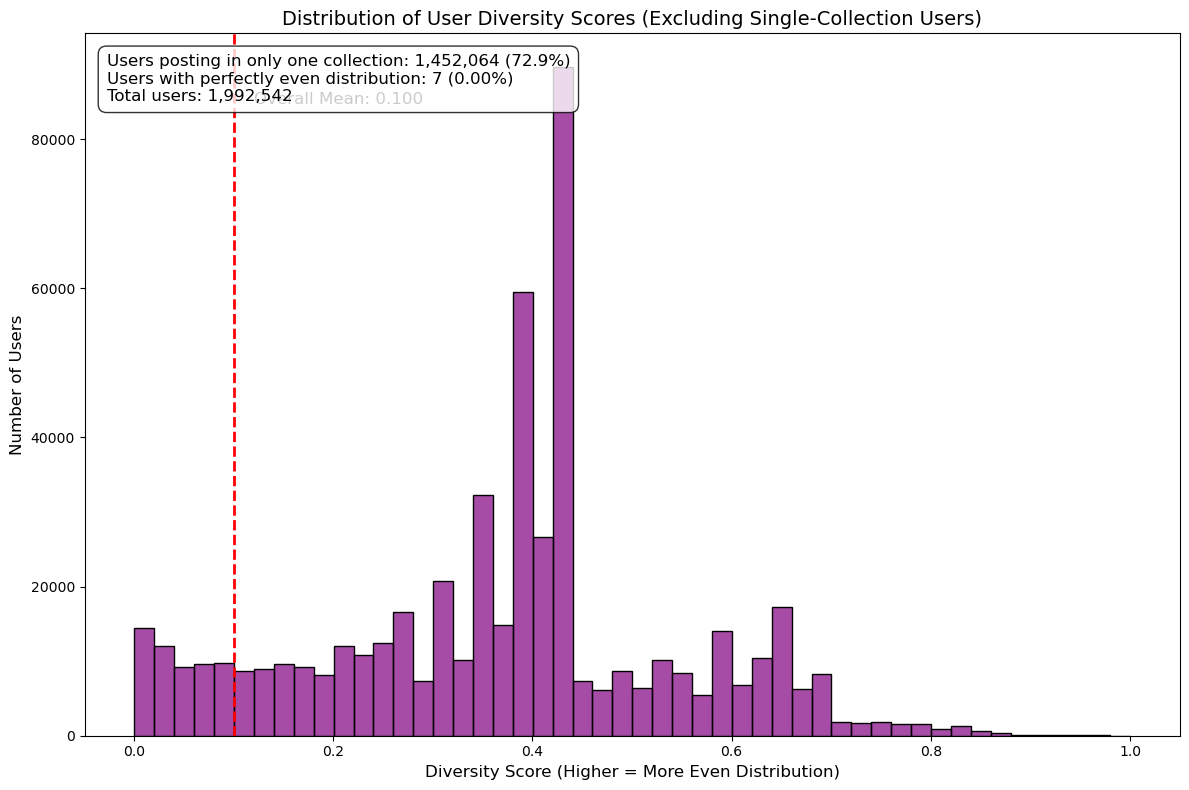

/var/folders/f0/t1bvby9d7y508w0qwvr297280000gp/T/ipykernel_30439/2907916048.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='active_collections', palette='viridis')


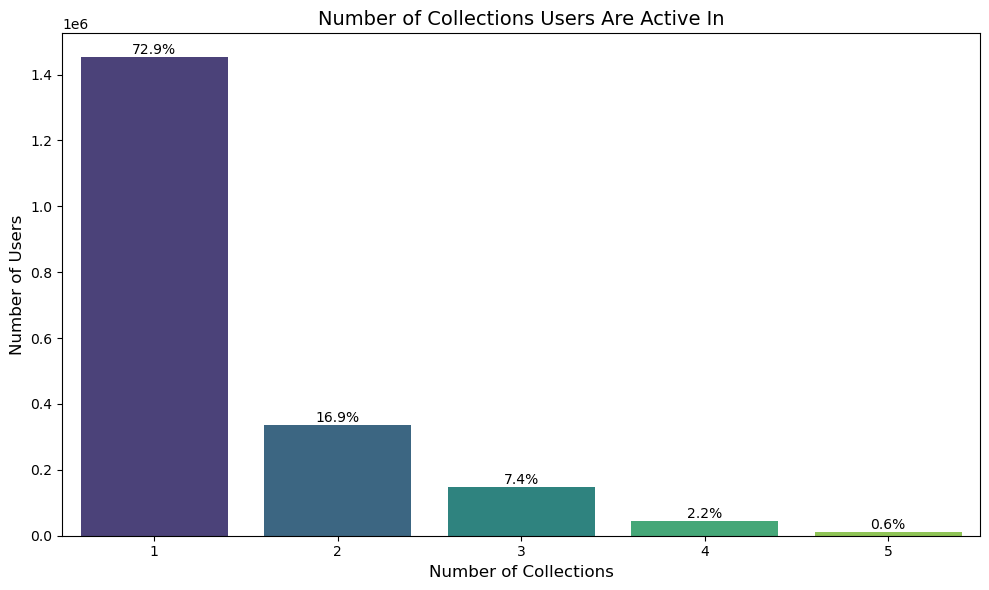

In [118]:

import matplotlib.pyplot as plt
import seaborn as sns

# Count users with exactly 0 diversity (single collection only)
zero_diversity_count = (df['diversity_score'] == 0).sum()
zero_diversity_pct = (zero_diversity_count / len(df)) * 100

# Count users with perfect diversity (equal distribution)
# Using a small threshold since floating point may not give exactly 1.0
perfect_diversity_count = (df['diversity_score'] > 0.99).sum()
perfect_diversity_pct = (perfect_diversity_count / len(df)) * 100

# Create a better visualization
plt.figure(figsize=(12, 8))

# Plot users with non-zero diversity
non_zero_df = df[df['diversity_score'] > 0]
sns.histplot(non_zero_df['diversity_score'], bins=50, color='purple', alpha=0.7)

plt.title('Distribution of User Diversity Scores (Excluding Single-Collection Users)', fontsize=14)
plt.xlabel('Diversity Score (Higher = More Even Distribution)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Add mean line
mean_diversity = df['diversity_score'].mean()
plt.axvline(mean_diversity, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_diversity + 0.02, plt.ylim()[1]*0.9, f'Overall Mean: {mean_diversity:.3f}', fontsize=12)

# Add annotations about single collection and perfect diversity
info_text = (f"Users posting in only one collection: {zero_diversity_count:,} ({zero_diversity_pct:.1f}%)\n"
             f"Users with perfectly even distribution: {perfect_diversity_count:,} ({perfect_diversity_pct:.2f}%)\n"
             f"Total users: {len(df):,}")

plt.annotate(info_text, xy=(0.02, 0.97), xycoords='axes fraction', 
             bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.8),
             va='top', fontsize=12)

plt.tight_layout()
plt.show()

# Calculate distribution of active collections per user
def count_active_collections(row):
    return sum(1 for i in range(5) if row[f'collection_{i}_pct'] > 0)

df['active_collections'] = df.apply(count_active_collections, axis=1)

# Plot distribution of the number of collections users are active in
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='active_collections', palette='viridis')
plt.title('Number of Collections Users Are Active In', fontsize=14)
plt.xlabel('Number of Collections', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)

# Add percentage labels on top of each bar
total = len(df)
for i, count in enumerate(df['active_collections'].value_counts().sort_index()):
    plt.text(i, count, f"{count/total*100:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()